In [1]:
!pip install opendatasets


Defaulting to user installation because normal site-packages is not writeable


In [2]:

import opendatasets as od

In [3]:
dataset = 'https://www.kaggle.com/datasets/saurabhshahane/adl-classification'

In [4]:
od.download(dataset)

Skipping, found downloaded files in ".\adl-classification" (use force=True to force download)


In [5]:
import os

In [6]:
data_dir = '.\\adl-classification'

In [7]:
os.listdir(data_dir)

['.ipynb_checkpoints']

In [8]:
!pip install shap

Defaulting to user installation because normal site-packages is not writeable


In [9]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

import shap

In [10]:
m_df = pd.read_csv('dataset.csv')
m_df

,670,696,1252,1720,1321,2431,4
0,641,674,1156,1652,1410,2433,4
1,642,646,1159,1643,1455,2361,4
2,640,590,1105,1608,1459,2427,4
3,616,627,1192,1637,1466,2447,4
4,780,896,1438,1813,1489,2434,4
...,...,...,...,...,...,...,...
1839,862,826,1564,1768,1540,2037,4
1840,917,821,1571,1779,1543,2008,4
1841,925,832,1582,1776,1545,1989,4
1842,928,840,1587,1787,1538,1986,4


In [11]:
m_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1844 entries, 0 to 1843
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   670     1844 non-null   int64
 1   696     1844 non-null   int64
 2   1252    1844 non-null   int64
 3   1720    1844 non-null   int64
 4   1321    1844 non-null   int64
 5   2431    1844 non-null   int64
 6   4       1844 non-null   int64
dtypes: int64(7)
memory usage: 101.0 KB


In [12]:
missing_vals = (m_df.isnull().sum())
print(missing_vals[missing_vals > 0])

Series([], dtype: int64)


In [13]:
h = m_df.head(10)
print(h)

   670   696  1252  1720  1321  2431  4
0  641   674  1156  1652  1410  2433  4
1  642   646  1159  1643  1455  2361  4
2  640   590  1105  1608  1459  2427  4
3  616   627  1192  1637  1466  2447  4
4  780   896  1438  1813  1489  2434  4
5  639   588  1050  1583  1519  2450  4
6  564   646  1231  1717  1523  2476  4
7  797   873  1289  1744  1544  2405  4
8  740   768  1192  1720  1567  2454  4
9  887  1068  1480  1847  1601  2438  4


In [14]:
t = m_df.tail(10)
print(t)

      670  696  1252  1720  1321  2431  4
1834  436  533  1114  1613   979  2101  2
1835  469  527  1124  1635   978  2090  2
1836  477  533  1088  1625   958  2126  2
1837  492  513  1091  1622   957  2101  2
1838  480  532  1119  1577   958  2125  2
1839  862  826  1564  1768  1540  2037  4
1840  917  821  1571  1779  1543  2008  4
1841  925  832  1582  1776  1545  1989  4
1842  928  840  1587  1787  1538  1986  4
1843  926  840  1606  1785  1555  1996  4


In [16]:
import seaborn as sns

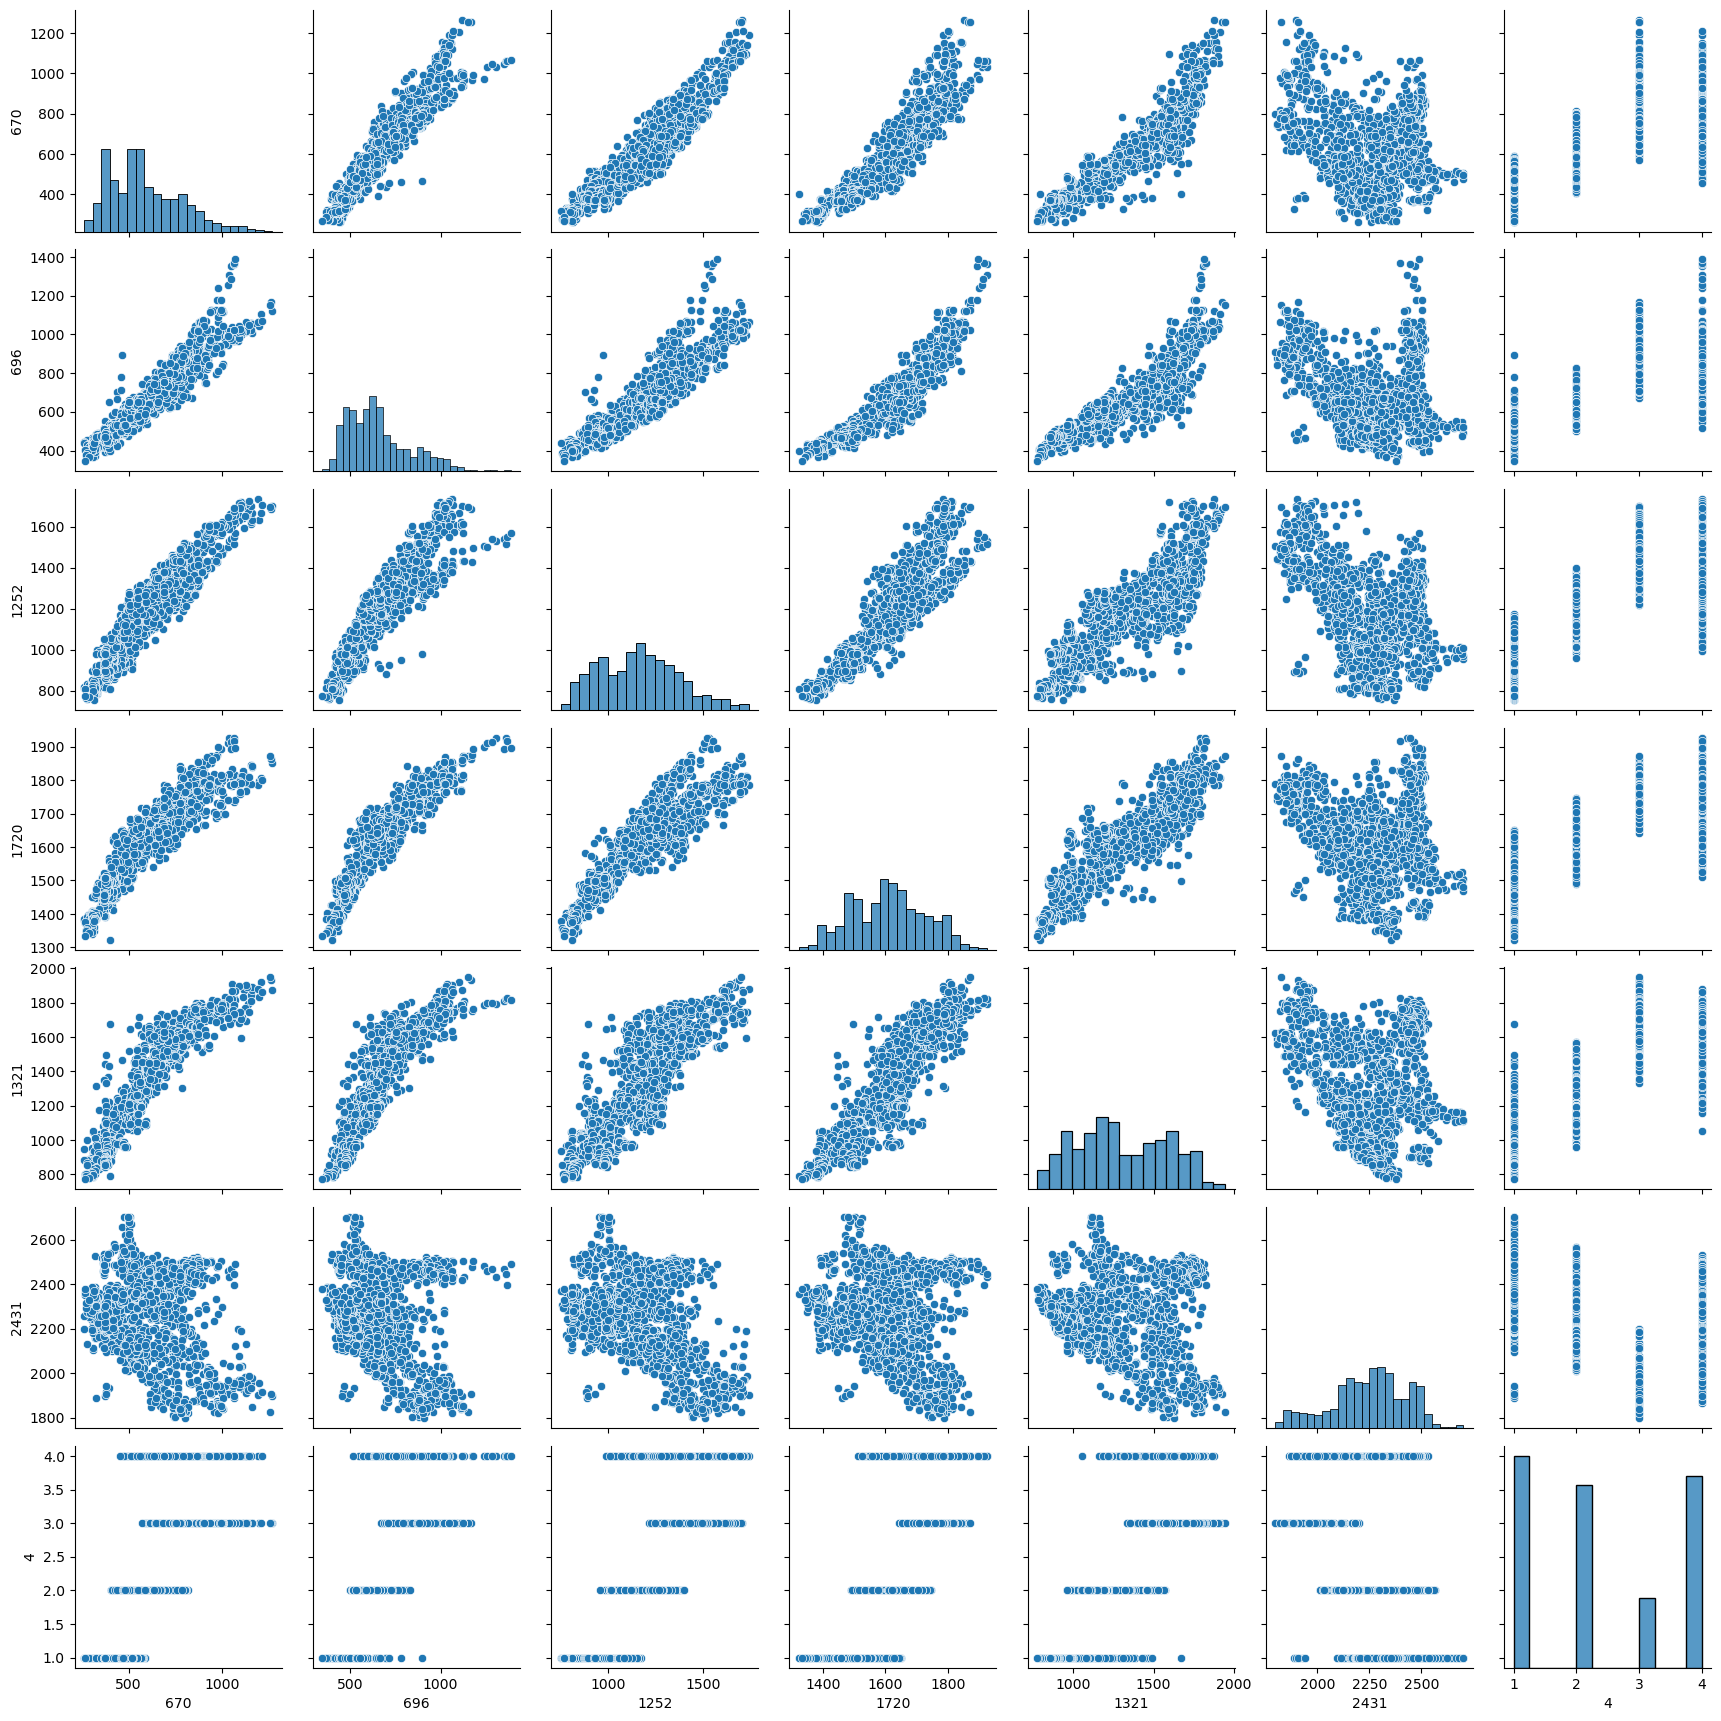

In [17]:
sns.pairplot(m_df)

In [18]:
df = pd.read_csv('dataset.csv', names=['MQ1', 'MQ2', 'MQ3', 'MQ4', 'MQ5', 'MQ6', 'CO2'])

In [19]:
df

,MQ1,MQ2,MQ3,MQ4,MQ5,MQ6,CO2
0,670,696,1252,1720,1321,2431,4
1,641,674,1156,1652,1410,2433,4
2,642,646,1159,1643,1455,2361,4
3,640,590,1105,1608,1459,2427,4
4,616,627,1192,1637,1466,2447,4
...,...,...,...,...,...,...,...
1840,862,826,1564,1768,1540,2037,4
1841,917,821,1571,1779,1543,2008,4
1842,925,832,1582,1776,1545,1989,4
1843,928,840,1587,1787,1538,1986,4


In [20]:
df.info

<bound method DataFrame.info of       MQ1  MQ2   MQ3   MQ4   MQ5   MQ6  CO2
0     670  696  1252  1720  1321  2431    4
1     641  674  1156  1652  1410  2433    4
2     642  646  1159  1643  1455  2361    4
3     640  590  1105  1608  1459  2427    4
4     616  627  1192  1637  1466  2447    4
...   ...  ...   ...   ...   ...   ...  ...
1840  862  826  1564  1768  1540  2037    4
1841  917  821  1571  1779  1543  2008    4
1842  925  832  1582  1776  1545  1989    4
1843  928  840  1587  1787  1538  1986    4
1844  926  840  1606  1785  1555  1996    4

[1845 rows x 7 columns]>

In [21]:
def preprocess_inputs(df):
    df = df.copy()
    
    # Split df into X and y
    y = df['CO2']
    X = df.drop('CO2', axis=1)
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)
    
    return X_train, X_test, y_train, y_test

In [23]:
X_train, X_test, y_train, y_test = preprocess_inputs(df)

In [24]:
X_train

,MQ1,MQ2,MQ3,MQ4,MQ5,MQ6
1695,551,650,1285,1643,1150,2160
427,624,682,1105,1661,1644,2518
289,485,553,1044,1563,1180,2523
529,440,520,932,1460,1154,2398
1443,622,688,1185,1689,1401,2283
...,...,...,...,...,...,...
905,591,689,1132,1652,1398,2279
1791,368,471,987,1446,883,2279
1096,370,478,884,1478,980,2234
235,380,410,860,1416,936,2215


In [25]:
y_train

1695    2
427     4
289     2
529     1
1443    4
       ..
905     4
1791    1
1096    1
235     1
1061    2
Name: CO2, Length: 1291, dtype: int64

In [26]:
model = RandomForestClassifier(random_state=1)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [27]:
acc = model.score(X_test, y_test)
print("Accuracy: {:.2f}%".format(acc * 100))

Accuracy: 94.40%


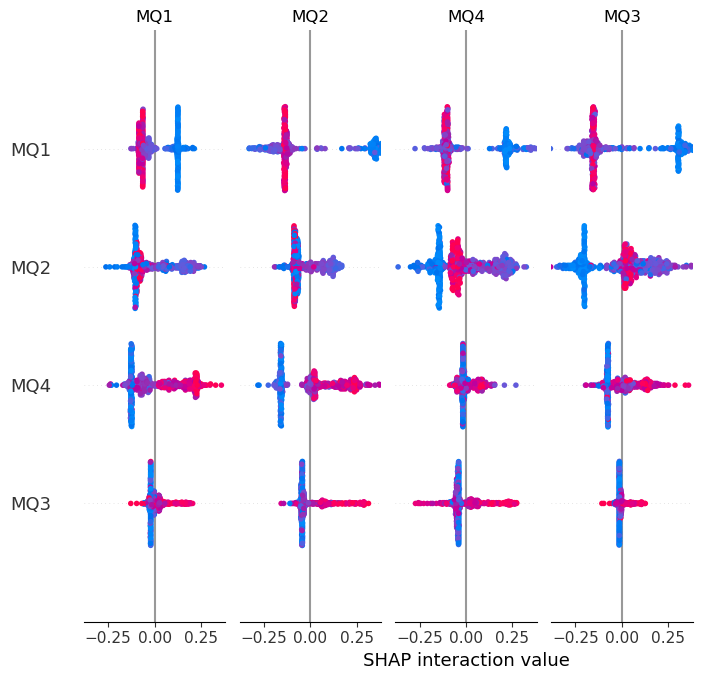

In [28]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, class_names=model.classes_)
